# Machine Learning with Python - Regression


## Learning goals

In this exercise you will learn how to use **linear regression** to predict a quantity of interest (a "label") based on data. The implementation of linear regression amounts to the minimization of a cost (or objective) function, which is known as **the empirical risk**. The empirical risk measures the error of a particular predictor when applied to some labeled data points (the **training data**) for which we know the correct value of the quantity of interest. 

You will hear about **gradient descent (GD)** which is a simple but powerful algorithm for finding the predictor which achieves the smallest possible empirical risk. Some variants of GD (such as "stochastic GD") underlie many state-of-the art ML methods (such as deep learning). A good understanding of GD is therefore a worthy asset for an ML engineer. We will also demonstrate how to generalize the basic linear regression model using a **feature mapping** to obtain **polynomial regression**. 

(Hint: You might reuse parts of the code developed in this notebook in other notebooks during this course.)

## Contents

1. Introduction
2. Data
3. Exercises
    * [3.1 Hands on the data](#3.1-Getting-Hands-on-the-Data)
    * [3.2 Scatterplots](#3.2-Scatterplots)
    * [3.3 Linear Regression](#3.3-Linear-Regression)
    * [3.4 Polynomial Regression](#3.4-Polynomial-Regression)
    * [3.5 Gradient Descent](#3.5-Gradient-Descent)

    
## Keywords

`Linear Regression`, `Gradient Descent (GD)`, `Mean Squared Error (MSE)`, `Empirical Risk Minimization (ERM)`, `Polynomial Regression`,`Data Visualization`

## Relevant Sections in [Course Book](https://arxiv.org/abs/1805.05052)  

Section 2; Section 3.1-3.2; Section 4, Section 5 



## 1 Introduction

In this exercise we will apply __linear regression__ to explore the dependencies between the __gross domain product (GDP)__ and the average __life expectancy__ of a country. In particular, we will try to predict life expectancy of the population based on the GDP of a country. Some background information on the concept of GDP and GDP per capita can be found here: https://www.investopedia.com/terms/p/per-capita-gdp.asp

Additional information on the Python packages used in this exercise can be found here:

- [NumPy](http://cs231n.github.io/python-numpy-tutorial/)
- [matplotlib](https://matplotlib.org/tutorials/index.html#introductory) 
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)


## 2 The Data

In order to learn a predictor for the life expectancy $y$ based on the GDP $x$ of a country, we use data from wikidata.org. For your convenience, we have already downloaded some data and stored in the file **country_wikidata.csv**. This file contains country names, population, average life expectancy and GDP. The following code snippet provides you some basic tools for reading in data from a file and how to visualize this data.

### Hints

- A **comma separated values (CSV)** file is a plain text file that contains a data with columns separated by a delimiter such as a comma ",".


In [ ]:
# import "Pandas" library/package (and use shorthand "pd" for the package) 
# Pandas provides functions for loading (storing) data from (to) files
import pandas as pd  

# import and define shorthand "plt" for "pyplot" package 
# pyplot provides functions for plotting data
from matplotlib import pyplot as plt 

# import and "IPython.display" package for printing tables
from IPython.display import display, HTML

# import and define shorthand "np" for "numpy" package 
# numpy is a widely used package for vector/matrix operations 
import numpy as np   

#read in data from csv file
df_country = pd.read_csv("country_wikidata.csv", delimiter=",")

## Show top 5 rows and last 5 of the file country_wikidata.csv
# function "display()" is Python command to show multiple function outputs from one cell. 
display(HTML(df_country.head(5).to_html(max_rows=5)))
display(HTML(df_country.tail(5).to_html(max_rows=5)))

## 3 Exercise

We now define an ML problem using data points $\mathbf{z}$ which represent individual countries. In particular, we will use the GDP (per capita) as the single feature $x$ which characterizes a data point $\mathbf{z}$ (country). The label $y$ of a data point (country) is defined as the average life expectancy of people living in that country. We aim at learning a predictor $h(x)$ which accurately estimates the life expectancy such that $h(x) \approx y$. 

The actual exercise starts from here and it has been divided into 5 parts:

* [3.1 Hands on the data](#3.1-Getting-Hands-on-the-Data)
* [3.2 Scatterplots](#3.2-Scatterplots)
* [3.3 Linear Regression](#3.3-Linear-Regression)
* [3.4 Polynomial Regression](#3.4-Polynomial-Regression)
* [3.5 Gradient Descent](#3.5-Gradient-Descent)

Your task is to implement the student task, which will be under a yellow box in each part.

## 3.1 Getting Hands on the Data

In order to learn (or find) a good predictor $h(x)$ which provides an estimate of the life expectancy $y$ based on the GDP $x$ of a country, we make use of the data stored in the file `country_wikidata.csv`. This file contains a labeled dataset $\mathbb{X} = \{\big(x^{(i)},y^{(i)}\big) \}_{i=1}^{m}$ which we will use to learn an accurate predictor $h(x)$ for the life expectancy. The dataset $\mathbb{X}$ consists of data points $z^{(i)} =\big(x^{(i)},y^{(i)}\big)$, for $i=1,\ldots,m$, with the feature $x^{(i)}$ being the GDP of country $i$. The quantity of interest (the label) $y^{(i)}$ is the life expectancy of country $i$. We would like to predict the life expectancy $y^{(i)}$ of a country based solely from its GDP $x^{(i)}$.

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Loading the Data. 
    </div>

The following code snippet

1. reads in the country data from the csv file `country_wikidata.csv`
2. removes rows with missing data ("NaN" fields)
3. creates a dataframe with column named "GDP_per_capita" (this is calculated as GDP_PPP / population)
4. sorts the rows in the dataframe in ascending order based on the newly created column "GDP_per_capita"

In [ ]:
# import libraries required in this exercise

import pandas as pd
from   matplotlib import pyplot as plt
import numpy as np
from   IPython.display import display

# read in data from "country_wikidata.csv" into the dataframe "df_country"
df_country = pd.read_csv("country_wikidata.csv", delimiter=",")

# remove all rows with missing data ("drop NaN fields")
df_country = df_country.dropna()

# normalize GDP by population of country 
df_country['GDP_per_capita'] = df_country['GDP_PPP']/df_country['population']

# sort rows in data frame according to GDP values 
df_country = df_country.sort_values(by=['GDP_per_capita'])

## 3.2 Scatterplots

Scatter plots are a helpful tool to visualize data points by representing them as "dots" in the two-dimensional plane. In particular, scatter plots can help to develop an intuition for  the relation between features and labels of data points. 
### Student Tasks

- 3.2.1 [Scatterplot](#scatterplot)

<a id='scatterplot'></a>
    <div class=" alert alert-warning"><b>Student Task</b> - Scatterplot

Generate a scatter plot using the Python function `plt.scatter()`.
- The x-axis of the scatter plot represents the values of the GDP $x^{(i)}$ and y-axis represents the life expectancy $y^{(i)}$ of country $i$.
    </div>
    

In [ ]:
# convert data to numpy vectors/matrices to make matrix multiplication easier
x_data = df_country['GDP_per_capita'].values
y_data = df_country['life_expectancy'].values

In [ ]:
#x = ...
#y = ...
# YOUR CODE HERE
raise NotImplementedError()

plt.scatter(x, y)
plt.title(r'$\bf{Figure\ 3.}$GDP vs. life expectancy')
plt.xlabel('GDP')
plt.ylabel('life expectancy')
axis = plt.gca()
plt.show()

In [ ]:
# Check that plot is a scatterplot. Requires plotchecker
from plotchecker import ScatterPlotChecker
pc = ScatterPlotChecker(axis)
assert len(pc.x_data) == 176, "Matrix dimensions are wrong"
assert len(pc.y_data) == 176, "Matrix dimensions are wrong"
print('Sanity check tests passed!')


## 3.3 Linear Regression 

Our goal is to predict the life expectancy $y^{(i)}$ for country $i$ based on the GDP $x^{(i)}$ of that country. Within linear regression, we try to do this prediction using linear functions which belong to the hypothesis space

\begin{equation*}
 \mathcal{H} = \{h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} \mbox{ for some } \mathbf{w} \in \mathbb{R}^{2}\}.
\label{eq1}
\tag{1}
\end{equation*}

In particular, we try to predict (or approximate) $y^{(i)}$ by the function value $h^{(\mathbf{w})}(\mathbf{x}^{(i)}) = \mathbf{w}^{T}\mathbf{x}^{(i)}$ using the augmented feature vector $\mathbf{x}^{(i)} = (x^{(i)},1)^{T}$ and some weight vector $\mathbf{w} \in \mathbb{R}^{2}$. At first sight, it seems strange to add a constant one to each feature value $x^{(i)}$ (the GDP of country $i$). However, using augmented feature vectors enlarges the class of functions $h^{(\mathbf{w})}$ which can be used for the prediction.

The prediction $h^{(\mathbf{w})}(\mathbf{x}^{(i)})$ will typically incur a non-zero __prediction error__ $y^{(i)} - h^{(\mathbf{w})}(\mathbf{x}^{(i)})$, which we quantify using its square $(y^{(i)} - h^{(\mathbf{w})}(\mathbf{x}^{(i)})^2$ (squared error loss). Since we have $m$ data points $(x^{(i)},y^{(i)})$ available, we can compute the __empirical risk__ (average loss)
\begin{equation*}
 \mathcal{E} (\mathbf{w}) = \Big(\frac{1}{m}\Big) \sum^{m}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2.
\label{eq2}
\tag{2}
\end{equation*}


Our goal is to find the optimal predictor $h_{\rm opt}(\cdot)$: 
\begin{equation}
h_{\rm opt}(\cdot) = \underset{{h^{(\mathbf{w})}} \in \mathcal{H}}{\operatorname{argmin}} \mathcal{E} (\mathbf{w}).
\label{eq3}
\tag{3}
\end{equation}

Since every function $h^{(\mathbf{w})}(\mathbf{x}) \in \mathcal{H}$ corresponds to a particular weight vector $\mathbf{w} \in \mathbb{R}^{2}$. We can rewrite the optimization problem (Eq. \ref{eq3}) as an optimization problem for the weight vector: 
\begin{align}
\mathbf{w}_{\rm opt} &= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \Bigg\{ \Big(\frac{1}{m}\Big) \sum^{m}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2 \Bigg\}\\
&= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \Big(\frac{1}{m}\Big) {||\mathbf{y}-\mathbf{X}\mathbf{w}||}_2^2,
\label{eq4}
\tag{4}
\end{align}
where
\begin{align}
\mathbf{X} = \big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}\big)^{T} \text{and }\mathbf{y} = \begin{bmatrix}y^{(1)}\\\vdots\\y^{(n)}\end{bmatrix}\ \mathbf{X} \in \mathbb{R}^{m \times 2},\mathbf{y}\in\mathbb{R}^{m}.
\end{align}
An optimal weight vector $\mathbf{w}_{\rm opt}$ solving \eqref{eq4} induces an optimal predictor $h_{\rm opt}(x) = h^{(\mathbf{w}_{\rm opt})}(\mathbf{x}) = \big( \mathbf{w}_{\rm opt} \big)^{T} \mathbf{x}$ which solves \eqref{eq3}. 
It can be shown that the optimization problem always has a solution $\mathbf{w}_{\rm opt}$, but the solution might not be unique, i.e., there are several different weight vectors achieving the minimum \eqref{eq4}. However, whenever the matrix $\mathbf{X}^T \mathbf{X}$ is invertible, the solution of (\ref{eq4}) is unique and given by the closed-form expression 
\begin{align}
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}.
\label{eq5}
\tag{5}
\end{align}

 
### Coding Tips

- You can use the numpy function `np.ones(n)` to generate a vector of ones (e.g. `[1,1,1, ..., 1]`) 
- To determine the length of a vector, you can use python function `len(vector)`
- To determine the dimensions of a numpy vector/matrix you can use `mat.shape`. try:
   - `mat = np.array([[1, 1, 1], [2, 2, 2]]); print("shape of the matrix is:", mat.shape);`

### Common Pitfalls

- Check the names of variables that you are using. It is easy to confuse `X` and `x` which are considered as different variables since Python is case-sensitive. 
- Pay attention to how you are transposing the matrices in your calculations. A single wrong transpose can lead to erroneous behavior.
- Please notice that in previous section code we used `x = ...` and `y = ...` and these variables still exist as you progress in this notebook, unless you replace them with something else

### Student Tasks

- 3.3.1 [Feature Matrix](#featurematrix)
- 3.3.2 [Compute Optimal Weight Vector](#fitfunction)
- 3.3.3 [Empirical Risk](#empiricalrisk)
- 3.3.4 [Predict function](#predictfunction)
- 3.3.5 [Linear Regression](#regressionfunction)

<a id='featurematrix'></a>
    <div class=" alert alert-warning"><b>Student Task.</b> - Feature Matrix

Implement a Python function `X=featureMatrix(x)` which, 

- reads in the vector $\mathbf{x}=(x^{(1)},...,x^{(m)})^{T}\in \mathbb{R}^{m}$, consisting of country GDPs $x^{(i)}$.
- The function should return the feature matrix $\mathbf{X}=\big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}\big)^{T} \in \mathbb{R}^{m \times 2}$ whose $i$th row  contains the (augmented) feature vector $\mathbf{x}^{(i)} = \big(x^{(i)},1\big)^{T} \in \mathbb{R}^{2}$. 

</div>

In [ ]:
def featureMatrix(x):
    """
    Augment value one to each data point in x and return the resulting matrix.
    
    :param x: data, type=numpy.ndarray. 
    
    :return: array-like, shape=(m, n), feature-matrix with n=2 features.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return X

In [ ]:
X_test = featureMatrix(x)
assert X_test.shape == (176, 2), "Output matrix of the function featureMatrix() has wrong dimensions."
assert X_test[:, 1].all() == 1, "One column should only include 1's"
print('Sanity check tests passed!')

<a id='fitfunction'></a>
    <div class=" alert alert-warning"><b>Student Task</b> - Compute Optimal Weight Vector

Implement a Python function `w_opt = fit(X, y)` which
- reads in the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ and label vector $\mathbf{y} \in \mathbb{R}^{m}$ with arbitrary number $m$ of data points and feature length $n$.
- The function should return the optimal weight vector $\mathbf{w}_{\rm opt}$ according to Eq. ([5](#mjx-eqn-eq5)) (thus, we can assume that the feature matrix $\mathbf{X}$ is such that $\mathbf{X}^{T}\mathbf{X}$ is invertible). 
</div>




In [ ]:
def fit(X, y):
    """
    Compute optimal weights as described in equation (5)
    
    :param X: data, type=numpy.ndarray. 
    :param y: data, type=numpy.ndarray. 
    
    :return: array-like, shape=(m, n).
    """
    ## Compute optimal w by replacing '...' with your solution.
    ## Hints: Check out numpy's linalg.inv(), dot() and transpose() functions.
    ## Note that X is uppercase.
    # w_opt = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    return w_opt

In [ ]:
x_test = np.array(([0,1],[2, 3])) # no reshape needed as enough dimensions for matrix multiplication
y_test = np.array(([5],[5])) # no reshape needed as enough dimensions for matrix multiplication
w_opt_test = fit(x_test, y_test)
assert w_opt_test.shape == (2, 1), "Weight matrix has wrong dimensions."
assert (w_opt_test[0][0] <= -4.999 and w_opt_test[0][0] >= -5.001), "Your implementation calculates wrong weights."
print('Sanity check tests passed!')


<a id='empiricalrisk'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Empirical Risk

Implement a Python function `err = empirical_risk(X, y, w)` which
- reads in the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$, label vector $\mathbf{y} \in \mathbb{R}^{m}$ and weight vector $\mathbf{w}\in \mathbb{R}^{n}$ of a linear predictor $\widehat{y} = \mathbf{w}^{T} \mathbf{x}$.
- The function should return the empirical error $\mathcal{E}(\mathbf{w}) = (\frac{1}{m}) \sum_{i=1}^{m} \big(\widehat{y}^{(i)} - y^{(i)}\big)^{2}$ (see Eq. ([2](#mjx-eqn-eq2))).
- The function should cope with arbitrary choices for number $m$ of data points and length $n$ of the feature vectors. 
</div>
</div>

In [ ]:
def empirical_risk(X, y, w_opt):
    """
    Calculate the empirical risk of the  prediction. Take a look at equation (2).

    :param X: array-like, shape=(m, n), feature matrix where n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
    :param w_opt: array-like, shape=(1, n), weight vector size of a feature
    
    :return: scalar-like, type=float
    """
    ## Compute empirical error by replacing '...' with your solution.
    ## Hints! Use X, y and w_opt to get necessary matrices. X is uppercase, y is lowercase.
    ##        Check out numpy's dot(), mean(), power() and subtract() functions.
    # empirical_error = ... 
    # YOUR CODE HERE
    raise NotImplementedError()
    return empirical_error

In [ ]:
x_test = np.array(([0, 1],[2, 3])) # no reshape needed as there are enough dimensions for matrix multiplication
y_test = np.array(([5],[5])) # no reshape needed as there are enough dimensions for matrix multiplication
w_opt_test = fit(x_test, y_test)
empirical_risk_test = empirical_risk(x_test, y_test, w_opt_test)
assert empirical_risk_test > 0 and empirical_risk_test < 1e-28, "Output of the empirical risk function should be a scalar that is larger than zero and in this test case less than '1e-28'"
print('Sanity check tests passed!')

<a id='predictfunction'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Predict function

Implement a Python function `y_hat = predict(X,w)` that
- reads in a feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ and weight vector $\mathbf{w} \in \mathbb{R}^{n}$. The function should return a vector $\widehat{\mathbf{y}}=\big(\widehat{y}^{(1)},\ldots,\widehat{y}^{(m)} \big)^{T} \in \mathbb{R}^{m}$ of length $m$ which contains the predicted labels $\widehat{y}^{(i)} = \mathbf{w}^{T} \mathbf{x}^{(i)}$ (see Eq. [1](#mjx-eqn-eq1).)
</div>



In [ ]:
def predict(X, w):
    """
    Calculate the prediction with original feature matrix and final weight vector
    :param X: array-like, shape=(m, n), feature matrix where  is the number of features
    :param w: array-like, shape=(1, n), weigh vector size of a feature
    
    :return: array-like, shape=(m, 1), prediction with given weight vector and feature matrix.
    """
    ## Predict new y data by replacing '...' with your solution.
    ## Hint! Use X and w_opt to get necessary matrices.
    # y_pred ...
    # YOUR CODE HERE
    raise NotImplementedError()
    return y_pred

In [ ]:
x_test = np.array(([0,1], [2, 3])) # no reshape needed as enough dimensions for matrix multiplication
y_test = np.array(([0], [1])) # no reshape needed as enough dimensions for matrix multiplication
w_opt_test = fit(x_test, y_test)
assert w_opt_test.shape == (2, 1), "Matrix dimensions of the weights matrix are wrong."
pred_test = predict(x_test, w_opt_test)
print('Sanity check tests passed!')

<a id='regressionfunction'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Linear Regression
Implement a Python function `w_opt, err = linearRegression(X,y)` which

- reads in the vector $\mathbf{x}=\big(x^{(1)},\ldots,x^{(m)}\big)^{T} \in \mathbb{R}^{m}$ of GDP values and the vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T} \in \mathbb{R}^{m}$ of life expectancy values for the countries.
- The function should return the optimal weight vector $\mathbf{w}_{\rm opt}$ and the corresponding minimum empirical error $\mathcal{E}(\mathbf{w}_{\rm opt})$.

**Hint:** You should make use and combine the functions implemented above. 
</div>

In [ ]:
def labelVector(y):
    """
    :param y: array-like, shape=(m, 1), label-vector
    
    :return: array-like, shape=(m, 1), reshaped label vector.
    """
    
    return np.reshape(y,(len(y),1))

def linearRegression(x, y):
    """
    Generate optimal weights and empirical error of the polynomial regression model
    
    :param x: array-like, shape=(m, n), feature matrix where n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
   
    :return w_opt array-like, optimal weights of the model
    :return empirical_error scalar-like, empirical_error of the model    
    """
    ## Calculate X, Y, w_opt and empirical_error
    ## Hints! Use featureMatrix() and labelVector() to get necessary matrices, X and Y.
    # X = ... 
    # Y = ...
    # w_opt=...
    # empirical_error=...
    # YOUR CODE HERE
    raise NotImplementedError()
    return w_opt, empirical_error

In [ ]:
w_opt, empirical_error = linearRegression(np.array([0,1,2,3]), np.array([0,1,2,3]))
# Because of computational rounding errors, empirical error is almost never exactly 0
assert empirical_error < 1e-30, "Empirical error is too high"
assert w_opt.shape == (2, 1), "Weight matrix has wrong dimensions" # test for matrix dimension
print('Sanity check tests passed!')

<a id='drawplot'></a>
<div class=" alert alert-info"><b>Demo.</b> Visualize Empirical Risk.</div>
  
Execute the cell below. You should obtain a plot similar to $\bf{Figure\ 3.}$, but with a legend showing the empirical error and your prediction line in red.

In [ ]:
def draw_plot(x, y, title=''):
    """
    Draws the plot of the data

    :param x: array-like, shape=(m, n), feature matrix where m is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
    :param optional title, title of the plot.
    
    :return: nothing
    """
    w_opt, empirical_error = linearRegression(x, y)
    x_pred = np.linspace(0,max(x),100)
    y_pred = predict(featureMatrix(x_pred), w_opt)
    # Plot data points and linear regression fitting line
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(x_pred,y_pred,'r', label=("Empirical = %.4f" % empirical_error))
    plt.title(title)
    plt.xlabel('GDP per capita')
    plt.ylabel('Life expectancy')
    plt.legend()
    axis = plt.gca()
    plt.show()

    
######### Linear regression model for x and y data #########
draw_plot(x, y, r'$\bf{Figure\ 4.}$ GDP per capita and life expectancy')

## 3.4 Polynomial Regression

When looking at $\bf{Figure\ 3.}$, it seems that the relation between life expectancy $y$ and GDP $x$ of a data point (country) is not linear. Therefore it is useful to consider a hypothesis space constituted by non-linear functions. One of the most basic non-linear functions are polynomial functions
\begin{equation}
\label{equ_def_poly_hyposapce}
\mathcal{H}^{(d)}_{\rm poly} = \{ h^{(\mathbf{w})}(\cdot): \mathbb{R} \rightarrow \mathbb{R}: h^{(\mathbf{w})}(x) = \sum_{r=0}^{d} w_{r+1} x^{r} \mbox{, with some } \mathbf{w} =(w_{1},\ldots,w_{d})^{T} \in \mathbb{R}^{d} \}.
\end{equation}
Note that the hypothesis space $\mathcal{H}^{(d)}_{\rm poly}$ is parametrized by the number $d$ which is the maximum degree of the polynomial functions contained in $\mathcal{H}^{(d)}_{\rm poly}$.

As in previous part [3.3 Linear-Regression](#3.3-Linear-Regression), the quality of a predictor $h^{(\mathbf{w})}$ is measured by the squared error loss and linear regression amounts to minimizing the  average squared error loss (mean squared error):
\begin{equation} 
\min_{h \in \mathcal{H}_{\rm poly} } \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h^{(\mathbf{w})}(x^{(i)}))^{2} \mbox{, where } h^{(\mathbf{w})}(x)=\sum_{r=0}^{d} w_{r+1} x^{r}.
\end{equation} 

It can be shown (Section [3.4 Polynomial-Regression](#3.4-Polynomial-Regression) of the course book) that polynomial regression is equivalent to combining linear regression with a feature map. In particular, we map the features $x$ (GDP per capita) of the data points to a higher dimensional feature space using the feature map 

\begin{equation}
\phi(x) = (x^{d},..,x^1, x^0)^{T} \in \mathbb{R}^{d}.
\label{eq7}
\tag{7}
\end{equation}

This feature map takes the original feature $x^{(i)} \in \mathbb{R}$ (GDP per capita) of the $i$th country as input and returns a new feature vector $\mathbf{x}^{(i)}= \phi(x^{(i)}) \in \mathbb{R}^{n}$ of length $n=d+1$ where $d$ is the maximum degree for the polynomials in $\mathcal{H}^{(d)}_{\rm poly}$. The resulting feature matrix is  
\begin{equation*}
    \mathbf{X}_{poly}=\begin{bmatrix}
        (x^{(1)})^{d} & \dots & (x^{(1)})^{1}& (x^{(1)})^{0}\\
        (x^{(2)})^{d} & \dots & (x^{(2)})^{1}& (x^{(2)})^{0}\\
      \vdots & \ddots& \vdots & \vdots\\
       (x^{(m-1)})^{d} & \dots & (x^{(m-1)})^{1}& (x^{(m-1)})^{0}\\
      (x^{(m)})^{d} & \dots & (x^{(m)})^{1}& (x^{(m)})^{0}
    \end{bmatrix}.
\label{eq8}
\tag{8}
\end{equation*}

Polynomial regression is is equivalent to linear regression with new features meaning $\mathbf{x}^{(i)} = \phi(x^{(i)})$, with $x^{(i)}$ being the GDP per capita of country $i$. 

### Student Tasks

- 3.4.1 [Feature Mapping](#featuremapping)
- 3.4.2 [Polynomial Regression](#polynomialregression)

<a id='featuremapping'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Feature Mapping
    
Implement a Python function `X_poly = feature_mapping(x, d)` which

- reads in a vector $\big(x^{(1)},\ldots,x^{(m)}\big) \in \mathbb{R}^{m}$ which contains the feature values (GDP) $x^{(i)}$ of the data points in $\mathcal{X}$.
- This function should return the feature matrix $\mathbf{X}_{\rm poly}$ (Eq. ([8](#mjx-eqn-eq8))) with given degree $d$ (which is an input parameter with default value $d=1$).

</div>

In [ ]:
# Enlarge the scalar feature (GDP) using feature mapping with polynomials 
# return matrix with following mappings:
#      [[x_1^(d), x_1^(d-1), x_1^(d-2), ... , x_1^(0)]
#        ...         ...        ...     ...     ... 
#       [x_m^(d), x_m^(d-1), x_m^(d-2), ... ,x_m^(0)]]
# 
# Please implement as above, where the first term is to the power of "d".
#
def feature_mapping(x, d=1):
    """
    Generate a feature map.
    
    :param x: array-like, data. 
    :param d: scalar-like, type: int, degree of the polynomial. 
    
    :return: array-like, shape=(m, n), feature-map with n=d+1 features.
    """
    ## Compute specified feature mapping by replacing '...' with your solution.
    ## Hints! Use x to get all the feature vectors of the data set.
    ##  Check out numpy's power(), vstack(), hstack() and column_stack() functions.
    ##  It is not necessary to use any or all of the above mentioned functions, but they might be helpful.      
    # polynomial_features = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    return polynomial_features

In [ ]:
d_test = 2
X_test = feature_mapping(x, d_test)
assert X_test.shape == (len(x), 3), "The feature matrix returned by the 'feature_mapping()' function has wrong dimensions."
print('Sanity check tests passed!')


<a id='polynomialregression'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Polynomial Regression

Implement a Python function `w_opt, empirical_error = polynomialRegression(x, y, d=1)` which implements the following steps: 
- use `feature_mapping(x, d)` to obtain the feature matrix (Eq. [8](#mjx-eqn-eq8))
- compute the optimal weight vector `w_opt` by inserting the feature matrix (Eq. [8](#mjx-eqn-eq8)) into (Eq. [5](#mjx-eqn-eq5))
- use weight vector to compute predictions $\hat{y}$ for the labels $y$
- compute the empirical risk obtained when predicting the labels in the dataset $\mathcal{X}$ 
</div>

In [ ]:
# This function is to transform the label vector to proper format
def labelVector(y):
    # Reshape y to ensure correct behavior when doing matrix operations
    return np.reshape(y,(len(y),1))

# Polynomial regression model for feature mapping.
# Take advantage of functions used in 3.3 Linear Regression
def polynomialRegression(x, y, d=1):
    """
    Generate optimal weights and empirical error of the linear regression model
    
    :param x: array-like, shape=(m, n), feature matrix where n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
    :param d: array-like, polynomial degree of the model.
    
    :return w_opt array-like, optimal weights of the model
    :return empirical_error scalar-like, empirical_error of the model    
    """
    ## Calculate w_opt, empirical_error, X and Y
    # X = ...
    # Y = ...
    # w_opt=...
    # empirical_error=...
    # YOUR CODE HERE
    raise NotImplementedError()
    return w_opt, empirical_error

In [ ]:
w_opt_test, empirical_error_test = polynomialRegression(x, y, d=5)
assert w_opt_test.shape == (6, 1), "Output matrix of the 'polynomialRegression()' function has wrong dimensions."
print('Sanity check tests passed!')


<a id='polynomialscatter'></a>
<div class=" alert alert-info"><b>Demo.</b> Visualize Polynomial Regression</div>
    
The following code generates a scatter plot of the dataset $\mathcal{X}$ and adds a red curve representing the optimal polynomial predictor. 


In [ ]:
def draw_plot(x, y, title='', degree=1):
    """
    Draws the plot of the data

    :param x: array-like, shape=(m, n), feature matrix where m is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
    :param optional title, title of the plot.
    :param optional degree, the degree of the polynomial.
    
    :return: nothing
    """
    w_opt, empirical_error = polynomialRegression(x, y, degree)
    
    x_pred = np.linspace(0, 150000, 10000)
    
    # predict new y values using feature mapping
    y_pred = predict(feature_mapping(x_pred, degree), w_opt)
    # Plot data points and linear regression fitting line
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(x_pred, y_pred,'r', label=("Empirical = %.4f" % empirical_error))
    plt.annotate(r'$h^{(\mathbf{w})}(x)$', xy=(120000, 77), xytext=(90000, 73),
            arrowprops=dict(color='red',arrowstyle='-|>'),fontsize=15)
    plt.title(title)
    plt.xlabel('feature x (GDP per capita)')
    plt.ylabel('label y (life expectancy)')
    plt.legend()
    plt.show()

        
######### Linear regression model for x and y data #########
draw_plot(x,y,r'$\bf{Figure 5.}$GDP vs. life expectancy',degree=5)

## 3.5 Gradient Descent

Recall section  [3.3 Linear Regression](#3.3-Linear-Regression) above, where the optimal predictor $h^{(\mathbf{w}_{\rm opt})}$ was found by minimizing empirical error $\mathcal{E}(\mathbf{w})$ using the closed-form solution 

\begin{align}
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y},
\label{eq5}
\tag{5}
\end{align}

with the matrix $\mathbf{X}$ containing the feature vectors $\mathbf{x}^{(i)}$ and the vector $\mathbf{y}$ containing 
the labels $y^{(i)}$ of the data points. There are two challenges with using the closed-form expression \eqref{eq5}: First, it only applies if the matrix $\mathbf{X}^T \mathbf{X}$ is invertible (note that we have little control over the features as those are obtained from measurements). Second, inverting the matrix $\mathbf{X}^T \mathbf{X}$ might be computationally infeasible if we have a lot (billions) of features. Luckily, there is an alternative method for finding the optimal weight vector $\mathbf{w}_{\rm opt}$ which avoids these two challenges. This method is based on a simple iterative procedure for finding the minimum of a function: gradient descent **(GD)**. 

GD amounts to iteratively updating a current guess (or approximation) $\mathbf{w}^{(k)}$ for the optimal weight $w_{\rm opt}$ according to the rule:

\begin{equation*}
    \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \alpha {\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w}^{(k)}).
    \label{eq10}
    \tag{10}
\end{equation*}
The choice of the step-size $\alpha$ is crucial for how quickly (and if at all) the iterates $\mathbf{w}^{(k)}$ converge to an optimal weight vector $\mathbf{w}_{opt}$ which yields smallest empirical risk (see [3.3 Linear-Regression](#3.3-Linear-Regression)). 

Note that the implementation of GD requires to compute the gradient ${\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w})$.
For linear regression and squared error loss this gradient is obtained as 

\begin{equation*}
{\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w}) =-\frac{2}{m}\sum^{m}_{i=1}\mathbf{x}^{(i)}(y^{(i)} - {{\mathbf{w}}}^{T} \mathbf{x}^{(i)}) = -\frac{2}{m} \mathbf{X}^{T}(\mathbf{y}-\mathbf{X} \mathbf{w}).
\label{eq11}
\tag{11}
\end{equation*}

GD is started by initializing the weight vector $\mathbf{w}$ to some value, either randomly or setting $\mathbf{w}^{(0)}=\big(0,\dots,0\big)^{T}$ and then repeating the GD update \eqref{eq10} until some termination criterion is met. Two simple options for the termination criterion are: 
- (i) using a fixed number of iterations
- (ii) checking the decrease of the objective function and stopping when the decrease is below a threshold. 

It can shown that for a sufficiently small step size $\alpha$, GD always converges to the optimal weight vector $\mathbf{w}_{\rm opt}$, regardless of which initial guess $w^{(0)}$ has been used. The convergence speed depends crucially on the precise choice of the step size $\alpha$: If $\alpha$ is too large, the iterations may not converge at all while if $\alpha$ is too small, the convergence is unacceptably slow. 

### Hints

* `empirical_risk()` and `X`, `y` -variables are same as in `linearRegression()`!
* Check the names of variables that you are using. it is easy to confuse `X` and `x`.
* Running the code might take some time (up to 10 minutes) depending on your computer speed. Take this into account before you assume that your code crashed or doesn't work.


### Intuition of Gradient Descent

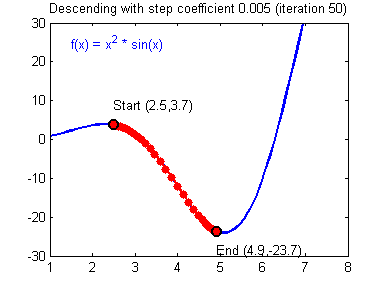
([illustration source](https://hackernoon.com/life-is-gradient-descent-880c60ac1be8))

One can think about GD (see \ref{eq10}) like rolling a ball down the hill blindfolded. In order to minimize some loss function (which we can think of as a landscape of hills and valleys), we need to find the lowest point of that function (roll a ball down the hill to the lowest point in the valley). If we were not blindfolded, we could see in which direction the steepest decline of the hill is, and we would move the ball there. As we are blind, we need to ask for a hint (which corresponds to calculating the gradient ${\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w})$) on which direction to move down. Indeed, the gradient "tells us" the direction of the steepest decline (moving the ball down the hill as fast as possible). We take a small step in that direction, then ask for another hint (we evaluate the gradient at the new location). This goes on either for a fixed number of iterations/steps or when the decrease that can be achieved from moving towards the direction of the gradient is below some threshold.

### The Role of the Step Size 

<img src="https://github.com/ivanbara/AICourse/blob/master/stepsize.jpg?raw=true" width="500">

If the step size $\alpha$ (see \ref{eq10}) is too large, instead of going down the hill, we might leap to the hill on the other side and even end up going up that side of the hill, thus not achieving convergence.

### Student Tasks

- 3.5.1 [Gradient function](#gradientfunction)
- 3.5.2 [Gradient Descent function](#gradientdescentfunction)
- 3.5.3 [Learning rate](#bestalpha)

<a id='gradientfunction'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Gradient Function

Implement a Python function `grad = gradient(X, y, w)` which

- computes the gradient according to (Eq. [11](#mjx-eqn-eq11)).
- This Python function requires as input a feature matrix $X$, label vector $y$ and returns a vector.
</div>

In [ ]:
# Compute gradient as described in equation (11)
# return vector:
#      [ [w_1]
#          ....
#        [w_d]]
def gradient(X, y, w):
    """
    Calculate a gradient

    :param X: array-like, shape=(m, n), feature matrix where m is amount of data rows and n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector where m is the amount of data rows
    :param w: array-like, shape=(1, n), weight vector with weights for each of n features
    
    :return: array-like, shape=(m, 1)
    """
    N = X.shape[0]
    ## Compute gradient by replacing '...' with your solution.
    ## Hint! Use X and y to get necessary matrices.
    ## Note: uppercase X and lowercase y as function input.
    # gradient = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    return grad

In [ ]:
X_test = np.array([[0, 1], [2, 3]])
Y_test = np.array([[4], [2]])
w_test = np.zeros((X_test.shape[0], Y_test.shape[1]))
gradient_test = gradient(X_test, Y_test, w_test)
assert gradient_test.shape == (2, 1), "Output matrix returned by the 'gradient(X, y, w)' function has wrong dimensions"
print('Sanity check tests passed!')


<a id='gradientdescentfunction'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Gradient descent function

Complete Python function `err_vec = gradient_descent(x, y, a, k)` which
- implements the GD update (Eq. [10](#mjx-eqn-eq10)).
- This Python function takes feature matrix $X$, label vector $y$ learning rate $\alpha$ and max iterations as inputs and outputs a vector of empirical errors.

**Hint:** You should reuse functions that you already implemented in exercise [3.3 Linear-Regression](#3.3-Linear-Regression)
</div>



In [ ]:
# Run GD for k steps
# a = alpha/learning rate
# k = iteration steps
# returns empirical error vector with lenght k: [ Empirical_1, ..., Empirical_k ]
def gradient_descent(x, y, a, k):
    """
    Gradient Descent with Logistic Regression
    
    :param X: array-like, shape=(m, n), feature matrix where n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
    :param a: scalar-like, type=int, defines step size of each iteration of gradient descent
    :param k: scalar-like, type=int, how many steps we should take.
    
    :return: array-like, shape=(k)
    """
    ## Hints! Same as in linearRegression()!
    # X = ...
    # Y = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # normalize data by a constant to use reasonable learning rates
    X = X/1000000
    
    # Initial weigth vector (all values 0)
    w = np.zeros((X.shape[1], Y.shape[1]))
    empirical_errors = []

    for i in range(k):
        # Calculate gradient
        grad = gradient(X, Y, w)
        
        ## Update weight vector by replacing '...' with your solution.
        # w = ...
        # YOUR CODE HERE
        raise NotImplementedError()
        
        # Calculate Empirical Risk and append the error into empirical_errors vector
        # YOUR CODE HERE
        raise NotImplementedError()
    return empirical_errors

In [ ]:
for i in [1,10,100,200,243]:
    err_vec = gradient_descent([0,0.5,1], [0,0.5,1], 1e-5, i)
    assert len(err_vec) == i, "Size of the error vector is wrong"
print('Sanity check tests passed!')


<a id='polynomialscatter'></a>
<div class=" alert alert-info"><b>Demo.</b> Visualize Gradient descent</div>
    
The following code generates curves that show the convergence with different learning rates and adds a red curve representing your chosen learning rate. 

In [ ]:
def visualize_error(x, y, learning_rates, best_alpha = None):
    """
    Generate 2 plots which visualize the error over each gradient descent step
    
    :param X: array-like, shape=(m, n), feature matrix where n is the amount of features
    :param y: array-like, shape=(m, 1), label-vector
   
    :return axes: plot-axes, python plot library axes which includes both plots
    """
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    for learning_rate in learning_rates:
        # Plot Error against Step Size
        GD_converge=gradient_descent(x, y, learning_rate, 1000)   
        axes[0].plot(GD_converge,label=(r'$\alpha=$'+str(learning_rate))) 

    axes[0].set_xlabel('Number of Iterations')
    axes[0].set_ylabel('Empirical Error')
    axes[0].legend(loc=0)
    axes[0].set_title(r'$\bf{Figure\ 6.}$Converge of GD')
    
    for learning_rate in learning_rates:
        # Plot Error against Step Size.
        # Now mark the best converge in red. Use value from best as a correct step size.
        GD_converge=gradient_descent(x, y, learning_rate, 1000)

        if learning_rate == best_alpha:
            axes[1].plot(GD_converge,label=(r'$\alpha=$'+str(learning_rate)), color="red")
        else:
            axes[1].plot(GD_converge,label=(r'$\alpha=$'+str(learning_rate)), color="blue")
    
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Empirical Error')
    axes[1].legend(loc=0)
    axes[1].set_title(r'$\bf{Figure\ 7.}$Converge of GD')
    plt.tight_layout()
    return axes, best_alpha

<a id='bestalpha'></a>
<div class=" alert alert-warning"><b>Student Task</b> - Learning Rate

- The code snippet below creates a figure entitled "$\bf{Figure\ 6.}$ Converge of GD" which depicts the convergence of GD for different values of the step-size (these different values are in variable `learning_rates`
- Determine which learning rate yields fastest convergence and store in the variable `best_alpha` 
- Create a $\bf{Figure\ 7.}$ which is identical fo $\bf{Figure\ 6.}$ except for the color coding of the curves (each curve corresponds to one particular step size): the curve corresponding to `best_alpha` should be red and the remaining curves in blue. 
</div>

In [ ]:
learning_rates = np.array([0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.99])

chosen_alpha = None
# Change chosen_alpha=None into step size from the vector that provides the fastest convergence. e.g chosen_alpha=0.1
# YOUR CODE HERE
raise NotImplementedError()

GD_plots, best = visualize_error(x, y, best_alpha=chosen_alpha, learning_rates=learning_rates)

In [ ]:
assert best != None, "You have not specified the best learning rate using the function 'visualize_error' input variable 'best_alpha', please define the chosen_alpha, e.g. chosen_alpha=0.1"

# Check that plots are rendered.
from plotchecker import LinePlotChecker
for GD_plot in GD_plots:
    pc = LinePlotChecker(GD_plot)
    pc.assert_num_lines(8)
plt.show()
print('Sanity check tests passed!')
